LAB - EDA Univariate Analysis 

Part 1: Understanding Product Categories 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
link = 'amz_uk_price_prediction_dataset.csv'

df = pd.read_csv(link)

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
#1.1 Frequency Tables 

# Frequency table for 'category'
frequency_table = df['category'].value_counts()

frequency_table

#Creating subset for top five categories 
top_categories = frequency_table.head(5);
print(top_categories)



category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


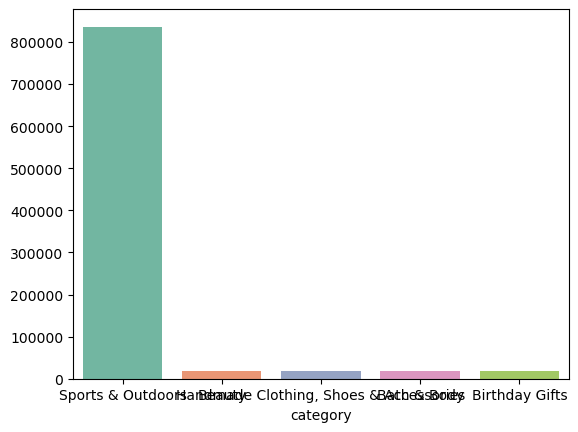

In [6]:
#1.2 Visualizations

# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set2" palette
sns.barplot(x=top_categories.index, y=top_categories.values, palette="Set2");

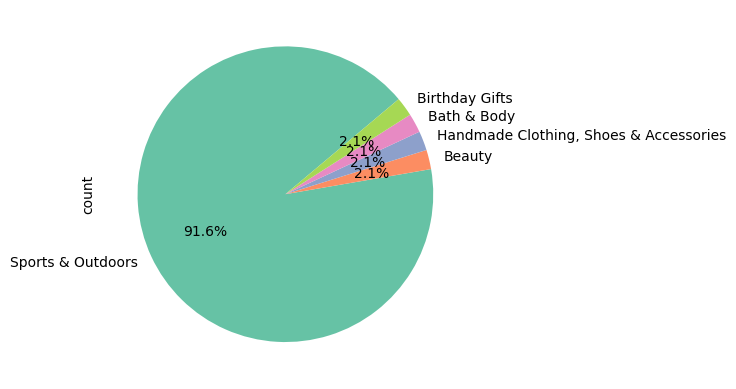

In [8]:
# Plotting a pie chart of the 'top_categories' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set2" Seaborn palette
df['category'].value_counts().head().plot.pie(autopct='%1.1f%%', startangle=40, colors=sns.color_palette("Set2"));

The Sports and Outdoors category dominates over all the others. 

Part 2: Delving into Product Pricing 

2.1. Measures of Centrality

In [9]:
#Mean, Median, Mode 
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode()[0]

price_mean, price_median, price_mode

#The average price point of listed products is $89, which is about nine times the most common price point. 

(89.24380943923663, 19.09, 9.99)

2.2 Measures of Dispersion

In [15]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, range_price, quantiles_price

#There is a high level of variance. The range of prices is $100,000, which serves as an indicator of that variance. 

(119445.48532256528,
 345.60886175352226,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

c:\Users\wilfe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


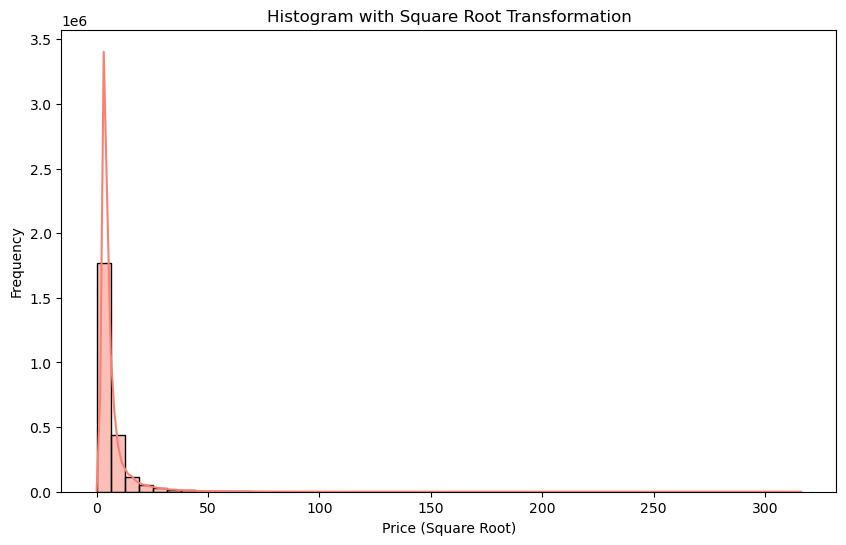

In [22]:

transformed_data = np.sqrt(df['price'])
plt.figure(figsize=(10, 6))
sns.histplot(transformed_data, kde=True, bins=50, color="salmon")
plt.title('Histogram with Square Root Transformation')
plt.xlabel('Price (Square Root)')
plt.ylabel('Frequency')
plt.show()

#Used square root values so as to see a little bit better what's going on with the histogram because the original line of code made it so hard to see. 

<Axes: >

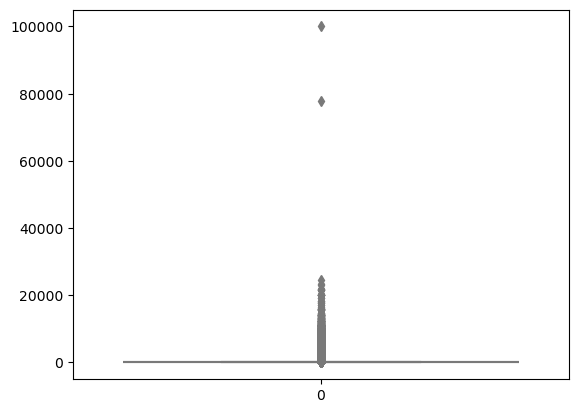

In [23]:
sns.boxplot(data = df['price'], color="lightblue")

#If we think about the interquartile range that we see up a few cells, the spread is very narrow compared to the outliers. There is a huge amount of variance, but most of the products are between $10 and $46. 

Part 3: Unpacking Product Ratings 

3.1 Measures of Centrality 

In [24]:
#Mean, Median, Mode 
stars_mean = df['stars'].mean()
stars_median = df['stars'].median()
stars_mode = df['stars'].mode()[0]

stars_mean, stars_median, stars_mode

#It seems like this might be skewed by the fact that most people don't rate their purchases, which might be what is affecting the median and the mode. 

(2.152836472966065, 0.0, 0.0)

3.2 Measures of Dispersion 

In [26]:
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])


variance_stars, variance_stars, range_stars, quantiles_stars

#There seems to be a wide variance in the ratings for these products. It basically jumps up to 4.4 from 0, which shows some inconsistencies. 

(4.81743402976196,
 4.81743402976196,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

3.3 Shape of the Distribution

In [27]:
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

skewness_stars, kurtosis_stars

#The low positive value of skewness indicates that it there are some ratings that pull the tail out to the right, but they are more so outliers and pull the mean upwards. It is close to zero, however which is supposed
#to indicate a nearly symmetrical distribution. 

#The negative kurtosis indicates a distribution that is slightly less peaked than a normal distribution. 


(0.08120735761080985, -1.9260061280432985)

3.4 Visualizations

c:\Users\wilfe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

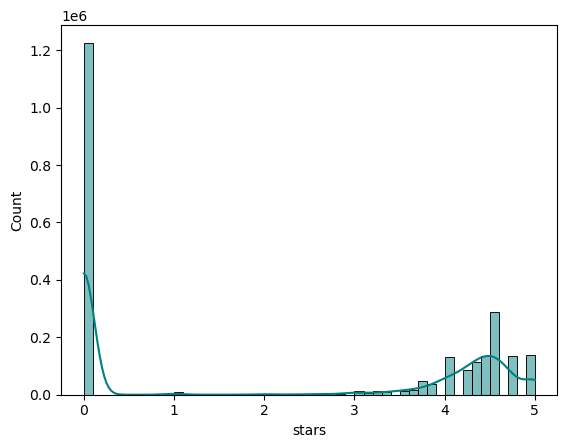

In [28]:
sns.histplot(df['stars'], kde=True, bins=50, color="teal")

The most common rating is 0, which seems to indicate more so that most people just don't rate their purchases, because I don't think you can even rate a product with 0 stars. 